Dataset Shape: (2205, 39)

Dataset Columns: Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38  

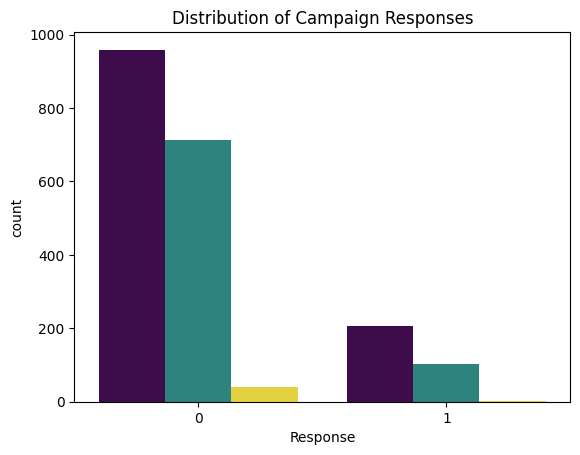

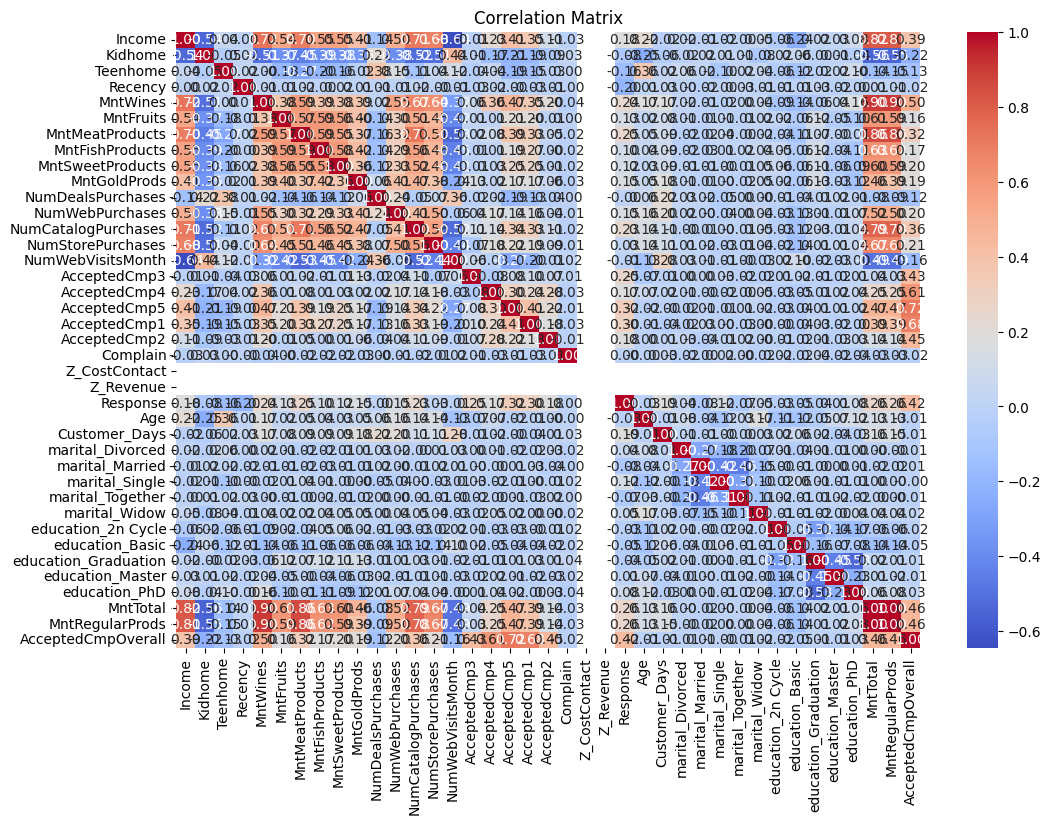

A/B Test Results:
AcceptedCmp1: t-statistic = 9.81, p-value = 0.0000
AcceptedCmp2: t-statistic = 6.56, p-value = 0.0000
AcceptedCmp3: t-statistic = 8.24, p-value = 0.0000
AcceptedCmp4: t-statistic = 5.84, p-value = 0.0000
AcceptedCmp5: t-statistic = 10.69, p-value = 0.0000
Explained Variance Ratios: [0.24127434 0.06903733 0.06132137 0.04844416 0.04200566]


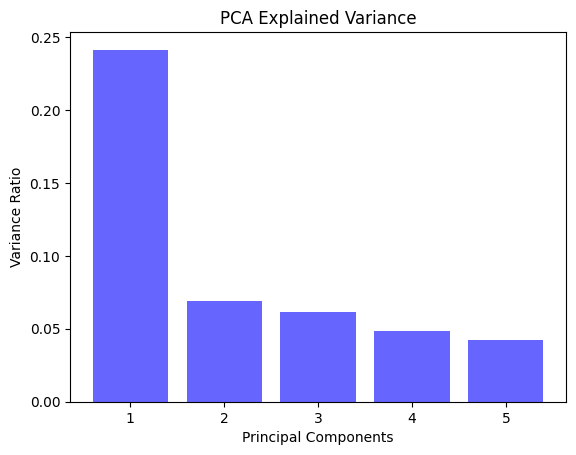

Overall Campaign Response Rate: 15.39%
Best Performing Campaign: AcceptedCmp4 with acceptance rate 7.67%
Customer Complaint Rate: 0.94%
Average Spending by Category:
MntFishProducts      37.603662
MntMeatProducts     166.059871
MntFruits            26.364671
MntSweetProducts     27.268679
MntWines            306.492331
MntGoldProds         43.921821
dtype: float64


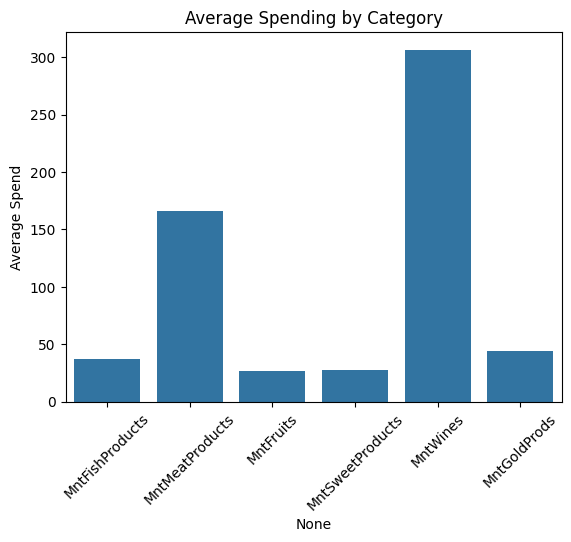


Key Insights for Marketing Teams:
1. The overall campaign response rate is 15.39%.
2. Campaign AcceptedCmp4 performed the best with an acceptance rate of 7.67%.
3. Customer complaints are low (0.94%), but addressing them could improve satisfaction.
4. Customers spend the most on wines, followed by meat products. Campaigns tailored around these categories may yield better results.


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Dataset
data = pd.read_csv('ifood_df.csv')

# Display basic dataset information
print(f"Dataset Shape: {data.shape}\n")
print(f"Dataset Columns: {data.columns}\n")
print(data.head())

# Data Preprocessing and Cleaning
def preprocess_data(data):
    # Fill missing values if any
    if data.isnull().sum().sum() > 0:
        data.fillna(data.median(), inplace=True)

    # Remove duplicate rows
    data.drop_duplicates(inplace=True)

    return data

data = preprocess_data(data)

# Exploratory Data Analysis (EDA)
def perform_eda(data):
    print("Summary Statistics:\n", data.describe())

    # Distribution of target variable
    sns.countplot(x='Response', data=data, hue='Kidhome', palette='viridis')
    plt.legend([], [], frameon=False)  # Suppresses the legend
    plt.title('Distribution of Campaign Responses')
    plt.show()

    # Correlation heatmap
    corr = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

perform_eda(data)

# A/B Testing on Campaign Effectiveness
def perform_ab_testing(data):
    campaigns = [f'AcceptedCmp{i}' for i in range(1, 6)]
    results = {}

    for campaign in campaigns:
        response = data[data[campaign] == 1]['Response']
        no_response = data[data[campaign] == 0]['Response']

        stat, pval = ttest_ind(response, no_response, equal_var=False, nan_policy='omit')
        results[campaign] = {'t-statistic': stat, 'p-value': pval}

    return results

ab_results = perform_ab_testing(data)
print("A/B Test Results:")
for campaign, result in ab_results.items():
    print(f"{campaign}: t-statistic = {result['t-statistic']:.2f}, p-value = {result['p-value']:.4f}")

# Statistical Modeling for Campaign Optimization
def perform_pca(data):
    numeric_features = data.select_dtypes(include=['float64', 'int64'])
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_features)

    pca = PCA(n_components=5)
    pca_data = pca.fit_transform(scaled_data)
    explained_variance = pca.explained_variance_ratio_

    print("Explained Variance Ratios:", explained_variance)

    plt.bar(range(1, 6), explained_variance, alpha=0.6, color='b', label='Explained Variance')
    plt.title('PCA Explained Variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Variance Ratio')
    plt.show()

perform_pca(data)

# Insights Generation
def generate_insights(data):
    # Overall Response Rate
    overall_response_rate = data['Response'].mean()
    print(f"Overall Campaign Response Rate: {overall_response_rate:.2%}")

    # Best performing campaign
    campaign_acceptance = {f'AcceptedCmp{i}': data[f'AcceptedCmp{i}'].mean() for i in range(1, 6)}
    best_campaign = max(campaign_acceptance, key=campaign_acceptance.get)
    print(f"Best Performing Campaign: {best_campaign} with acceptance rate {campaign_acceptance[best_campaign]:.2%}")

    # Customer complaints analysis
    complaints_rate = data['Complain'].mean()
    print(f"Customer Complaint Rate: {complaints_rate:.2%}")

    # Spending insights
    avg_spending = data[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].mean()
    print("Average Spending by Category:")
    print(avg_spending)

    sns.barplot(x=avg_spending.index, y=avg_spending.values)
    plt.legend([], [], frameon=False)  # Suppresses the legend
    plt.title('Average Spending by Category')
    plt.ylabel('Average Spend')
    plt.xticks(rotation=45)
    plt.show()

    return best_campaign, campaign_acceptance

best_campaign, campaign_acceptance = generate_insights(data)

# Conclusion for Non-Technical Audience
print("\nKey Insights for Marketing Teams:")
print(f"1. The overall campaign response rate is {data['Response'].mean():.2%}.")
print(f"2. Campaign {best_campaign} performed the best with an acceptance rate of {campaign_acceptance[best_campaign]:.2%}.")
print(f"3. Customer complaints are low ({data['Complain'].mean():.2%}), but addressing them could improve satisfaction.")
print("4. Customers spend the most on wines, followed by meat products. Campaigns tailored around these categories may yield better results.")

